In [1]:
import scanpy as sc
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import phate
import multiscale_phate as MSphate
PROJECT_DIR="/home/shuangni/AlzheimerProject"
# PROJECT_DIR = "C:/Users/nishu/OneDrive - Universite de Montreal/AlzheimerProejct"

In [2]:
######
# load data_raw
######
DATA_DIR_raw = PROJECT_DIR + '/data/msPHATE_data_raw.h5ad'
data_raw = sc.read_h5ad(DATA_DIR_raw)
print(data_raw)
# print(data_raw.obs.index)

AnnData object with n_obs × n_vars = 82159 × 32738
    obs: 'id', 'amyloid', 'plaq_n', 'nft', 'tangles', 'cogn_global_lv', 'gpath', 'gpath_3neocort', 'amyloid.group', 'caa_4gp', 'ceradsc', 'braaksc', 'niareagansc', 'cogdx', 'msex', 'pathology.group', 'diagnosis'
    var: 'gene_id'


In [ ]:
print(data_raw)
print(data_raw.X)
print(data_raw.obs)
print(data_raw.obs.index)
print(data_raw.to_df().head())

In [ ]:
######
# replace non-numerical values to numbers in data_raw.obs
######
# data_raw.obs["msex"].replace({"female": "1", "male": "0"}, inplace=True)
# data_raw.obs["pathology.group"].replace({"early-pathology": "-1", "late-pathology": "1", "no-pathology": "0"}, inplace=True)
# data_raw.obs["amyloid.group"].replace({"high": "1", "low": "0"}, inplace=True)
# print(data_raw.obs.head())

In [ ]:
######
# load data_pp
######
DATA_DIR_pp = PROJECT_DIR + '/data/msPHATE_data_pp.h5ad'
data_raw = sc.read_h5ad(DATA_DIR_pp)
print(data_pp)

In [3]:
######
# plot_figures function
######
def plot_figures(x_axis, y_axis, hue_list, titles= None):
  
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))

    # plt.figure()
    sns.scatterplot(ax=axes[0,0], x = x_axis, y = y_axis, hue=hue_list[0], s = 5).set(title='Celltypes for '+ titles)

    # plt.figure()
    sns.scatterplot(ax=axes[0,1], x = x_axis, y = y_axis, hue=hue_list[1], legend=False, s = 5).set(title='Subclusters for '+ titles)
   
    # plt.figure()
    sns.scatterplot(ax=axes[1,0], x = x_axis, y = y_axis, hue=hue_list[2], s = 5).set(title='diagnosis for '+ titles)

    # plt.figure()
    sns.scatterplot(ax=axes[1,1], x = x_axis, y = y_axis, hue=hue_list[3], s = 5).set(title='Cerad Scorefor '+ titles)

    # plt.figure()
    sns.scatterplot(ax=axes[1,2], x = x_axis, y = y_axis, hue=hue_list[4], s = 5).set(title='braak_stages for '+ titles)

    # plt.figure()
    sns.scatterplot(ax=axes[0,2], x = x_axis, y = y_axis, hue=hue_list[5], s = 5).set(title='apoe_genotypes for '+ titles)

    plt.savefig(PROJECT_DIR + '/figures/'+ titles +'_all_fig.pdf')
    plt.savefig(PROJECT_DIR + '/figures/'+ titles +'_all_fig.jpg')

T-SNE results of data_pp

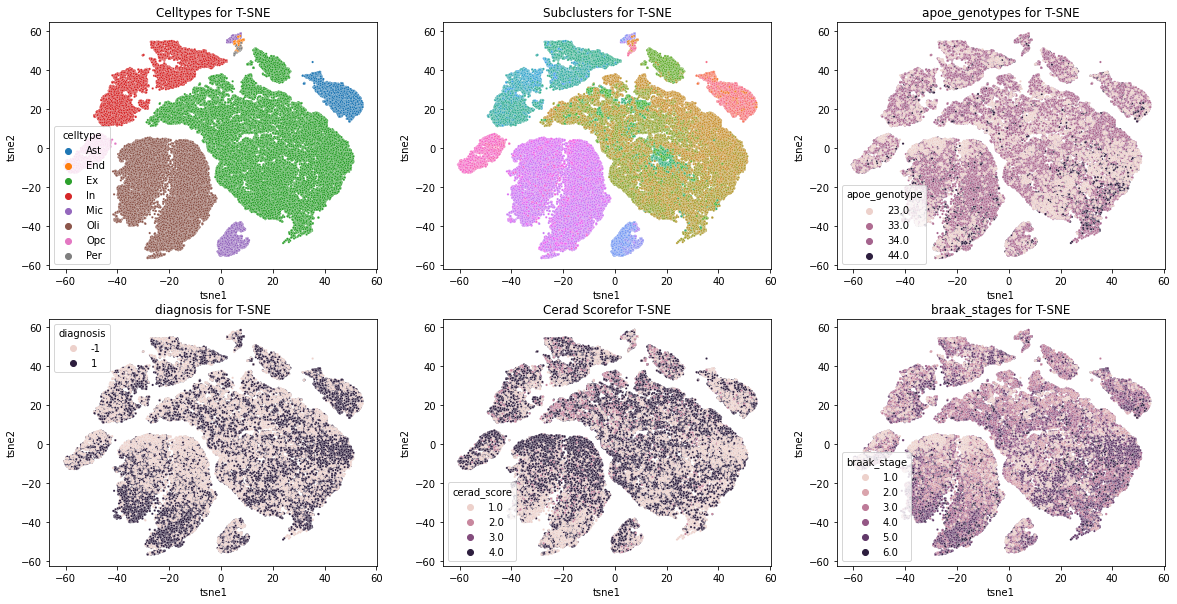

In [ ]:
######
# tsne results in data_pp plots
######
tsne1 = data_pp.obs.tsne1
tsne2 = data_pp.obs.tsne2

celltypes = data_pp.obs.celltype
Subclusters = data_pp.obs.Subcluster
cerad_scores = data_pp.obs.cerad_score
diagnosises = data_pp.obs.diagnosis
braak_stages = data_pp.obs.braak_stage
apoe_genotypes = data_pp.obs.apoe_genotype
hues = [celltypes, Subclusters, diagnosises, cerad_scores, braak_stages, apoe_genotypes]

plot_figures(x_axis=tsne1, y_axis=tsne2, hue_list = hues, titles= 'T-SNE')

PHATE for data_pp

In [ ]:
######
# PHATE for data_pp
######
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate_pp = phate_operator.fit_transform(data_pp)

Calculating PHATE...
  Running PHATE on 70634 observations and 17926 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 47.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 134.97 seconds.
    Calculating affinities...
    Calculated affinities in 17.17 seconds.
  Calculated graph and diffusion operator in 200.19 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 9.56 seconds.
    Calculating KMeans...
    Calculated KMeans in 8.36 seconds.
  Calculated landmark operator in 19.86 seconds.
  Calculating optimal t...
    Automatically selected t = 21
  Calculated optimal t in 1.44 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.58 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 6.32 seconds.
Calculated PHATE in 228.43 seconds.


[Text(0.5, 1.0, 'Celltype for PHATE (preprocessed)')]

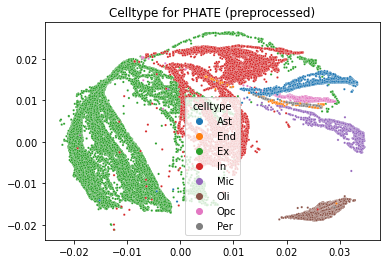

In [ ]:
plt.figure()
sns.scatterplot(x = Y_phate_pp[:,0], y = Y_phate_pp[:,1], hue=celltypes, s = 5).set(title='Celltype for PHATE (preprocessed)')
plot_figures(x_axis=Y_phate_pp[:,0], y_axis=Y_phate_pp[:,1], titles= 'PHATE (preprocessed)')

PHATE for data_raw without any preprcessing

In [5]:
######
# PHATE for raw data withou any process
######
phate_operator = phate.PHATE(n_jobs=-2)
Y_raw_phate = phate_operator.fit_transform(data_raw)

Calculating PHATE...
  Running PHATE on 82159 observations and 17 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 5.08 seconds.
  Calculated graph and diffusion operator in 5.12 seconds.
Calculated PHATE in 5.12 seconds.


[Text(0.5, 1.0, 'Celltype for PHATE')]

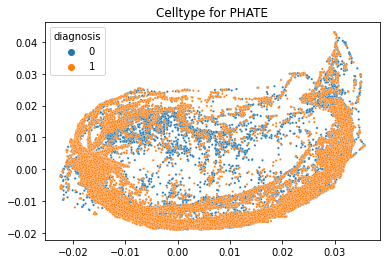

In [ ]:
diagnosis_raw = data_raw.obs.diagnosis
plt.figure()
sns.scatterplot(x = Y_raw_phate[:,0], y = Y_raw_phate[:,1], hue=diagnosis_raw, s = 5).set(title='diagnosis for PHATE')
# plot_figures(x_axis=Y_raw_phate[:,0], y_axis=Y_raw_phate[:,1], titles= 'PHATE (raw)')

Multiscale PHATE for data_raw without any preprcessing

In [ ]:
######
# MS-PHATE for raw data withou any process
######
MSphate_operator =  MSphate.Multiscale_PHATE(random_state=1)
levels = MSphate_operator.fit(data_raw)

In [ ]:
plt.figure()
ax = plt.plot(MSphate_operator.gradient)
ax = plt.scatter(levels, MSphate_operator.gradient[levels], c = 'r', s=100)
print(levels)

In [ ]:
plot_figures(x_axis = Y_phate_pp[:,0], y_axis = Y_phate_pp[:,1], titles= 'PHATE')

In [ ]:
# datatype not correct
data_pp_removed = data_pp.obs.drop(columns=['tsne1', 'tsne2'])
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate_pp = phate_operator.fit_transform(data_pp_removed)